In [1]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

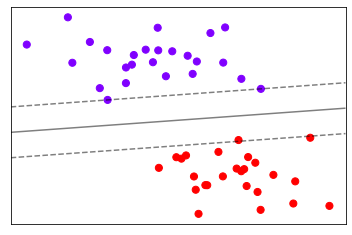

In [2]:
X,y = make_blobs(n_samples=50,centers=2,random_state=0,cluster_std=0.6)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='rainbow')
ax = plt.gca() #获取当前的子图，如果不存在，则创建新的子图
xlim = ax.get_xlim()
ylim = ax.get_ylim()


#建模，通过fit计算出对应的决策边界
clf = SVC(kernel = "linear").fit(X,y)
#重要接口decision_function，返回每个输入的样本所对应的到决策边界的距离
#然后再将这个距离转换为axisx的结构，这是由于画图的函数contour要求Z的结构必须与X和Y保持一致
#画决策边界和平行于决策边界的超平面
# 在最大值和最小值之间形成30个数据
axisx_ = np.linspace(xlim[0],xlim[1],30)
axisy_ = np.linspace(ylim[0],ylim[1],30)

axisy ,axisx = np.meshgrid(axisy_,axisx_)
xy = np.vstack([axisx.ravel(),axisy.ravel()]).T
Z = clf.decision_function(xy).reshape(axisx.shape)
ax.contour(axisx,axisy,Z
           ,colors="k"
           ,levels=[-1,0,1] #画三条等高线，分别是Z为-1，Z为0和Z为1的三条线
           ,alpha=0.5
           ,linestyles=["--","-","--"])
plt.xticks([])
plt.yticks([])
plt.show()

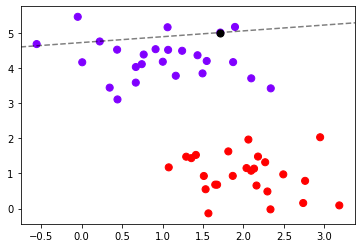

In [3]:
plt.clf()
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plt.scatter(X[10,0],X[10,1],c="black",s=50,cmap="rainbow")
ax = plt.gca()
ax.contour(axisx,axisy,Z
           ,colors="k"
           ,levels=[-3.33917354]
           ,alpha=0.5
           ,linestyles=["--"])
plt.show()

In [4]:
svectors = clf.support_vectors_
svectors[:,0]

array([0.44359863, 2.33812285, 2.06156753])

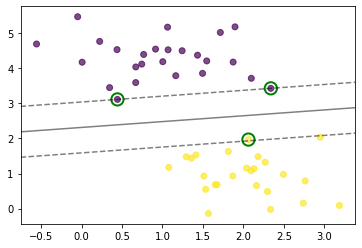

In [5]:
def plot_decision_boundary(X,y,clf):
    clf.fit(X,y)
    plt.clf()
    svectors = clf.support_vectors_
    plt.scatter(X[:,0],X[:,1]
                ,c=y
                #,cmap='rainbow'
                ,alpha=0.7)
    plt.scatter(svectors[:,0],svectors[:,1],edgecolor='green',linewidths=2,s=150, c='none')

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    meshN = 50
    meshX = np.linspace(xlim[0],xlim[1],meshN)
    meshY = np.linspace(ylim[0],ylim[1],meshN)
    meshY, meshX = np.meshgrid(meshY,meshX)
    # 算所有的点 xy
    xy = np.vstack([meshX.ravel(),meshY.ravel()]).T
    # 计算所有点的等高Z
    P = clf.decision_function(xy).reshape(meshX.shape)
    
    ax.contour(
        meshX
        , meshY
        , P
        , colors='k'
        , levels=[-1,0,1]
        , alpha=0.5
        , linestyles=['--','-','--']
    )
    #ax.set_xlim(xlim)
    #ax.set_ylim(ylim)
    plt.show()
X,y=make_blobs(n_samples=50,centers=2,random_state=0,cluster_std=0.6)
plot_decision_boundary(X,y,SVC(kernel='linear'))

## 来个环形数据.

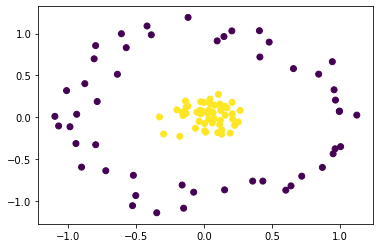

/A/develop/ide/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


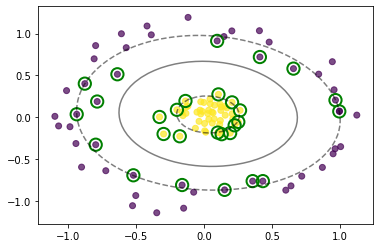

In [11]:
from sklearn.datasets import make_circles
X,Y = make_circles(100,factor=0.1,noise=.1)
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

plot_decision_boundary(X,Y,SVC(kernel='rbf'))

In [7]:
#定义一个由x计算出来的新维度r
from mpl_toolkits import mplot3d

/A/develop/ide/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  import sys


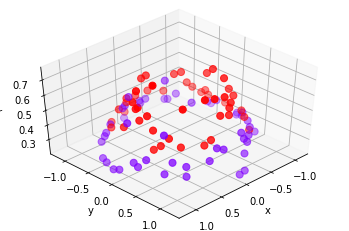

In [8]:
#定义一个绘制三维图像的函数
#elev表示上下旋转的角度
#azim表示平行旋转的角度
def plot_3D(elev=30,azim=30,X=X,y=y):
    plt.clf()
    r = np.exp(-(X**2).sum(1))
    rlim = np.linspace(min(r),max(r),0.2)
    ax = plt.subplot(projection="3d")
    ax.scatter3D(
        X[:, 0]
        , X[:, 1]
        , r
        , c=y
        , s=50 
        , cmap='rainbow'
    )
    ax.view_init(elev=elev,azim=azim)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("r")
    plt.show()
    
X,y = make_circles(n_samples=100 ,noise=.1)
plot_3D(45,45,X=X,y=y)

In [9]:
from ipywidgets import interact,fixed
interact(plot_3D,elev=[0,30],azip=(-180,180),X=fixed(X),y=fixed(y))
plt.show()

interactive(children=(Dropdown(description='elev', index=1, options=(0, 30), value=30), IntSlider(value=30, de…

## 核函数能够帮助我们解决三个问题：

### 第一，有了核函数之后，我们无需去担心 究竟应该是什么样，因为非线性SVM中的核函数都是正定核函数(positive definite kernel functions)，他们都满足美世定律(Mercer's theorem)，确保了高维空间中任意两个向量的点积一定可以被低维空间中的这两个向量的某种计算来表示（多数时候是点积的某种变换）。

### 第二，使用核函数计算低维度中的向量关系比计算原本的fai(xi).fai(xtest)要简单太多了。

### 第三，因为计算是在原始空间中进行，所以避免了维度诅咒的问题。

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import svm
from sklearn.datasets import make_circles, make_moons, make_blobs,make_classification

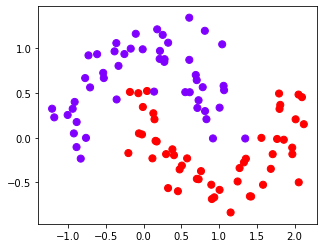

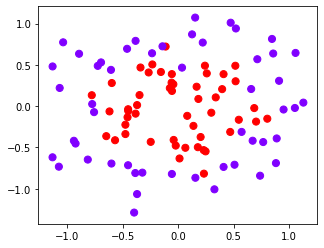

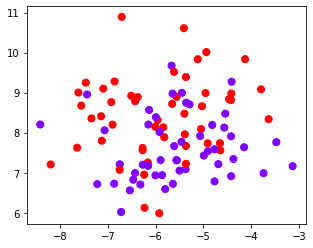

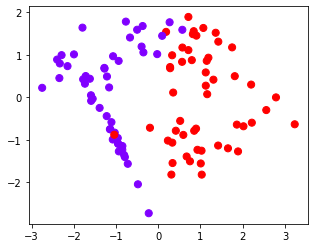

In [15]:
n_samples = 100
datasets = [
    make_moons(n_samples=n_samples, noise=0.2, random_state=0),
    make_circles(n_samples=n_samples, noise=0.2, factor=0.5, random_state=1),
    make_blobs(n_samples=n_samples, centers=2, random_state=5),
    make_classification(n_samples=n_samples,n_features =2,n_informative=2,n_redundant=0, random_state=5)
]
Kernel = ["linear","poly","rbf","sigmoid"]
#四个数据集分别是什么样子呢？
for X,Y in datasets:
    plt.figure(figsize=(5,4))
    plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="rainbow")
plt.show()